# HW#3_Data_Cleaning

นาย วรินทร์ สายปัญญา รหัสนิสิต 6630250435 sec.870

### ติดตั้ง libraries ก่อนรัน cell โค้ด

In [112]:
%pip install pandas
%pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


### อธิบายโค้ด

นำเข้า module library ของ pandas จากนั้นทำการอ่านไฟล์ข้อมูล csv โดยใช้ method read_csv จะได้ข้อมูลเป็น dataframe มาแล้วเก็บลงตัวแปร df จากนั้นทำการ แสดงตารางข้อมูลโดยใช้ method head แสดงรายการ 5 แถวแรก

In [50]:
import pandas as pd

df = pd.read_csv("auto-mpg.csv")

print(df.head())

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


### ค่าว่าง (null) และ การจัดการค่าว่าง

เช็คข้อมูลที่เป็นว่างแต่ละแถวใน dataframe โดยใช้ method isnull และ sum 
1. คำสั่งแรกเป็นการเช็คข้อมูลทุกแถวที่เป็นค่าว่างเปล่าแล้วใช้ method sum ต่อเพื่อนับจำนวนของค่าว่าง
2. คำสั่งที่สอง เป็นการเช็คข้อมูลทุกแถวที่เป็นค่าว่างเปล่าถ้าเป็นข้อมูลที่เป็นค่าว่างได้ True ถ้าไม่ใช้ค่าว่างได้ False

จะสังเกตุผลลัพธ์ที่ได้ว่าตารางข้อมูลนั้นไม่มีข้อมูลที่เป็นค่าว่าง null (สังเกตุจากคำสั่งแรกจะนับจำนวนข้อมูลที่เป็นค่าว่างทุกคอลัมน์นั้นไม่มีค่าว่างเลขจึงเป็น 0 ทุกคอลัมน์) เลยจึงไม่จำเป็นต้องจัดการกับค่าว่างใดๆ

In [51]:
print(df.isnull().sum())
print(df.isnull())

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64
       mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    False      False         False       False   False         False   
1    False      False         False       False   False         False   
2    False      False         False       False   False         False   
3    False      False         False       False   False         False   
4    False      False         False       False   False         False   
..     ...        ...           ...         ...     ...           ...   
393  False      False         False       False   False         False   
394  False      False         False       False   False         False   
395  False      False         False       False   False         False   
396  False      False         False       False   False         False   
397  False      False 

### จัดการค่าผิดปกติของข้อมูล

เนื่องจากได้ดูข้อมูลใน csv และตรวจสอบแล้วมีเพียงแค่ค่าข้อมูลในคอลัมน์ horsepower ที่มีเครื่องหมาย ? ที่ผิดปกติในบางจุดเราจะนำไปจัดการในหัวข้อ ข้อมูลที่อยู่ในรูปแบบไม่ถูกต้อง แทน 

### จัดการข้อมูลซ้ำ

เช็คข้อมูลแถวที่ซ้ำกันโดยเราจะกำหนดให้ว่ามีตัวแปร is_duplicated นั้นจะทำการเก็บข้อมูลเป็นชนิด boolean ที่มีค่าเป็น False ตอนเริ่มต้นเพื่อเป็นตัวบ่งบอกว่าข้อมูลในแถวนั้นมีค่าซ้ำกันไหม ถ้าเป็น True แปลว่ามีแถวที่ซ้ำกัน ถ้าเป็น False แปลว่าแถวไม่ซ้ำกัน จากนั้นเราทำการวน for loop แล้วเรียกใช้ method duplicated จะเป็นการเช็คแถวนั้นว่าค่าซ้ำกันไหม ถ้า True ข้อมูลแถวนั้นเป็นค่าซ้ำ ถ้า False ข้อมูลแถวนั้นไม่เป็นค่าซ้ำ ให้ตัวแปร i วน loop รับค่าข้อมูลจาก duplicated ทีละรอบ แล้วใน for loop เช็ค if ว่าถ้า i เป็น True จะให้กำหนดให้ is_duplicated เป็นค่า True แล้วออกจาก loop เมื่อจบจาก loop เราจะมาเช็ค if else ต่อว่าถ้า is_duplicated เป็น True แปลว่ามีข้อมูลซ้ำให้ใช้ method drop_duplicates เพื่อลบทุกแถวที่เป็นค่าซ้ำแล้วแสดงผลลัพธ์ออกมาว่ามีการลบข้อมูลซ้ำ ถ้า is_duplicated เป็น False ก็แสดงว่าตารางข้อมูลนั้นไม่มีข้อมูลที่มีค่าซ้ำกันเลยจึงแสดงผลลัพธ์ว่าไม่มีข้อมูลค่าซ้ำกัน จึงไม่ต้องจัดการข้อมูลที่มีค่าซ้ำกัน

In [52]:
is_duplicated = False

for i in df.duplicated():
    if i:
        is_duplicated = True
        break
    
if is_duplicated:
    df.drop_duplicates()  
    print('ลบข้อมูลแถวที่ซ้ำกันเรียบร้อย')
else:
    print('ไม่มีข้อมูลแถวที่ซ้ำกัน')

ไม่มีข้อมูลแถวที่ซ้ำกัน


### จัดการข้อมูลที่อยู่ในรูปแบบไม่ถูกต้อง

เช็คข้อมูลในแต่ละคอลัมน์ว่าเป็นชนิดอะไรบ้าง

In [53]:
print(df.dtypes)

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object


ทดลองดึงข้อมูลในคอลัมน์ horsepower เริ่มตั้งแต่แถวที่ 30 ถึงแถวที่ 40 เราจะสังเกตุได้ว่าข้อมูลในคอลัมน์ horsepower นั้นเป็นเลขแต่บางอันก็เป็นเครื่องหมาย ? ต่อมาเราเช็คอีกว่ามีเครื่องหมาย ? นี้ในแถวไหนบ้างก็เขียนคำสั่งที่ 2 ลงไปก็จะได้แถวที่มีเครื่องหมาย ? ในคอลัมน์ horsepower ณ จุดนี้เราเห็นปัญหาแล้วว่าข้อมูลในคอลัมน์ horsepower ควรเป็นชนิดข้อมูลที่เป็นเลขจำนวนเต็ม ไม่ใช้ ชนิด object หรือ string ที่รันใน cell ก่อนหน้า แปลว่าข้อมูลในคอลัมน์นี้มีรูปแบบที่ไม่ถูกต้อง 

ปัญหาที่ต้องจัดการ
1. แก้ไขสัญลักษณ์ ? เป็นเลขจำนวนเต็ม
2. แก้ไขชนิดข้อมูลของคอลัมน์จาก string เป็น int

In [54]:
print(df["horsepower"][30 : 41])
print(df[df["horsepower"] == "?"])

30     90
31     95
32      ?
33    100
34    105
35    100
36     88
37    100
38    165
39    175
40    153
Name: horsepower, dtype: object
      mpg  cylinders  displacement horsepower  weight  acceleration  \
32   25.0          4          98.0          ?    2046          19.0   
126  21.0          6         200.0          ?    2875          17.0   
330  40.9          4          85.0          ?    1835          17.3   
336  23.6          4         140.0          ?    2905          14.3   
354  34.5          4         100.0          ?    2320          15.8   
374  23.0          4         151.0          ?    3035          20.5   

     model year  origin              car name  
32           71       1            ford pinto  
126          74       1         ford maverick  
330          80       2  renault lecar deluxe  
336          80       1    ford mustang cobra  
354          81       2           renault 18i  
374          82       1        amc concord dl  


เราจะแก้ไขทั้ง 2 ปัญหา 
โดยเริ่มต้นเรา import module math เข้ามาก่อนต่อจากนั้นเราสร้างตัวแปร indexes ไว้จะเก็บเลข index ของเครื่องหมาย ? แต่ละแถว ต่อมาเขียน for loop ให้ i รับค่าจาก attribute df.index ที่เป็น range วน loop ตามจำนวนข้อมูลของตารางข้อมูล ด้านในใส่ if เช็คว่าถ้าค่าของข้อมูลในคอลัมน์ horsepower เป็นเครื่องหมาย ? หรือไม่ ถ้าเป็นจริงให้แก้ไขค่าของข้อมูลในคอลัมน์นั้นเป็นเลข 0 ไปก่อนแล้วเก็บตำแหน่ง index ของตำแหน่งนั้นไว้ จากนั้นเมื่อวน loop เสร็จให้แก้ไขชนิดข้อมูลในคอลัมน์ horsepower จาก object(string) เป็น int โดยใช้ method to_numeric ส่ง argument เป็นข้อมูลของคอลัมน์ horsepower
เมื่อแก้ไขเสร็จเราจะเปลี่ยนข้อมูลที่เรากำหนดค่าเป็น 0 ไว้ก่อนหน้านั้น ให้เป็นค่า mean ของคอลัมน์ horsepower แทน ใช้ method mean เพื่อได้ค่าเฉลี่ยเป็น floot แล้วเราใช้ method trunc เพื่อตัดทศนิยมออกเพราะเราต้องการชนิดข้อมูลที่เป็น int ต่อจากนั้นเขียน for loop รอบที่ 2 โดยให้วน loop รับค่า elements จาก indexes ที่เราเก็บเลข index ของเครื่องหมาย ? ไว้ก่อนแล้ว
แก้ไขตามตพแหน่งของ index โดยค่าของข้อมูลจากค่า 0 เป็นค่า mean แทน
สุดท้่ายแสดงผลลัพธ์ของข้่อมูลในคอลัมน์ horsepower เริ่มจากแถวที่ 30 ถึงแถวที่ 40 จะสังเกตุว่าเมื่อก่อนแถวที่ 32 มีค่าเป็น ? แต่ตอนนี้เป็นค่า 102 แล้ว

สิ่งที่แก้ไขคือ
แก้ไขจาก ? เป็น ค่าเฉลี่ยของคอลัมน์ horsepower แทน
แก้ไขชนิดของคอลัมน์จาก object เป็น int64 แทน

In [55]:
import math

indexes = []

for i in df.index:
    if df.loc[i, "horsepower"] == "?":
        df.loc[i, "horsepower"] = "0"
        indexes.append(i)

df["horsepower"] = pd.to_numeric(df["horsepower"])
mean = math.trunc(df["horsepower"].mean())

for j in indexes:
    df.loc[j, "horsepower"] = mean
    
print(df["horsepower"][30 : 41])

30     90
31     95
32    102
33    100
34    105
35    100
36     88
37    100
38    165
39    175
40    153
Name: horsepower, dtype: int64


### แสดงผลข้อมูลกราฟ

นำเข้า module ของ library วาดกราฟ

In [57]:
import matplotlib.pyplot as plt

ดึงข้อมูลจากคอลัมน์ model year และ mpg เก็บลงตัวแปรโดยใช้วิธี index slicing 
โดยให้ start = 0, stop = 201, step = 40, จะเลือกข้อมูลในคอลัมน์ใน index ที่ 0, 40, 80, 120, 160 และ 200 
รวมกันได้ข้อมูลมา 6 จำนวนนำมาแสดงผลข้อมูลบนกราฟ

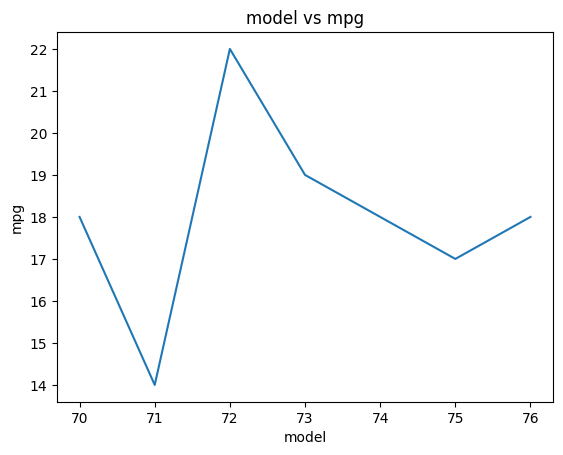

In [110]:
model_years = df["model year"][0:201:40]
mpgs = df["mpg"][0:201:40]

plt.plot(model_years, mpgs)
plt.title("model vs mpg")
plt.xlabel("model")
plt.ylabel("mpg")
plt.show()

ดึงข้อมูลจากคอลัมน์ car name และ horsepower เก็บลงตัวแปรโดยใช้วิธี index slicing 
โดยให้ start = 0, stop = 21, step = 5, จะเลือกข้อมูลในคอลัมน์ใน index ที่ 0, 5, 10, 15 และ 20 
รวมกันได้ข้อมูลมา 5 จำนวน โดยจะเอาชื่อรถมาแก้ต่อ ชื่อรถเราจะตัดเอามาเฉพาะแค่ชื่อด้านหน้าพอใช้ for loop ตัด string ที่เว้นว่างเพื่อเอาชื่อรถด้านหน้านำมาแสดง

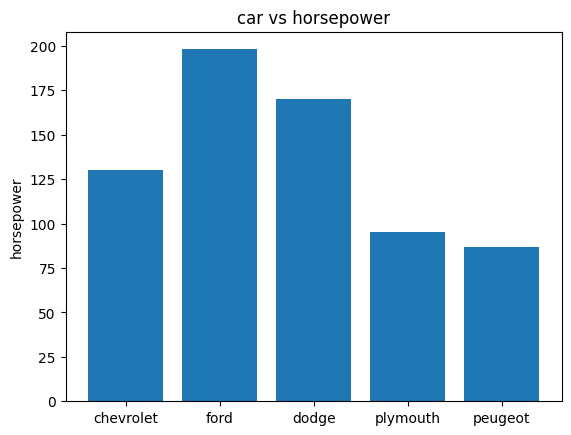

In [111]:
car_names = df["car name"][0:21:5]
hp = df["horsepower"][0:21:5]

for i in range(0, 21, 5):
    temp = car_names[i].split(" ")
    car_names[i] = temp[0]

plt.bar(car_names, hp)
plt.title("car vs horsepower")
plt.ylabel("horsepower")
plt.show()